In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_train_pred(x_train, y_train, y_pred):

    plt.scatter(x_train, y_train, marker = 'x', c = 'red', label = "Training Data")
    plt.plot(x_train, y_pred, c = 'blue', label = 'Predictions')
    plt.legend()

In [3]:
def array_sum(x):
    
    sum = np.sum(x)

    return sum

In [4]:
def compute_model_output(x, w, b):

    fwb = np.zeros(len(x))

    fwb = np.multiply(w, x)

    fwb += b

    return fwb

In [5]:
def compute_cost(x, y, w, b):

    m = len(x)

    fwb = compute_model_output(x, w, b)

    cost = (fwb - y)

    total_cost = array_sum(cost)        

    total_cost = total_cost.__pow__(2)

    total_cost = total_cost / ( 2 * m )

    return total_cost


In [6]:
def compute_gradient(x, y, w, b):

    m = len(x)

    dw = 0
    db = 0

    fwb = compute_model_output(x, w, b)

    cost = fwb - y

    dw = cost * x
    dw = array_sum(dw)

    db = cost
    db = array_sum(db)

    dw /= m
    db /= m

    return dw, db

In [7]:
def compute_gradient_descent(x, y, w, b, alpha):

        
    dw, db = compute_gradient(x, y, w, b)
    w = w - ( alpha * dw )
    b = b - ( alpha * db )

    return w, b

In [8]:
# x_train = np.array([0, 5, 10])
# y_train = np.array([5, 10, 15])

x_train = np.arange(0, 100, 5)
y_train = np.arange(5, 105, 5)

x_train, y_train

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100]))

In [32]:
# Creating a model

def train_model(x,  y, epoch, alpha):

    w = 0
    b = 0    
    cost_history = []
    epochs_history = []
    predictions = np.zeros([epoch, len(x)])

    for i in range(epoch):

        epochs_history.append(i)
        y_pred = compute_model_output(x, w, b) 
        cost = compute_cost(x, y, w, b)
        w, b = compute_gradient_descent(x, y, w, b, alpha)
        cost_history.append(cost)
        predictions[i] = y_pred

        print("--- Cost = ", cost, "--- w = ", w, "--- b = ", b, "--- remaining = ", epoch - (i + 1))

    return y_pred, cost_history, epochs_history, predictions, w, b

In [33]:
epochs = 1000

y_pred, cost_history, epochs_history, predictions, w, b = train_model(x_train, y_train, epochs, 0.0001)

--- Cost =  27562.5 --- w =  0.3325 --- b =  0.00525 --- remaining =  999
--- Cost =  13469.63401 --- w =  0.5623156874999999 --- b =  0.0089201 --- remaining =  998
--- Cost =  6646.643305644191 --- w =  0.721158348509375 --- b =  0.011498208474375 --- remaining =  997
--- Cost =  3324.5980156511514 --- w =  0.8309460919168522 --- b =  0.013321556498108032 --- remaining =  996
--- Cost =  1694.3549621045058 --- w =  0.906828208644158 --- b =  0.014623230405853173 --- remaining =  995
--- Cost =  885.6761476139334 --- w =  0.9592755388808464 --- b =  0.015564334091752837 --- remaining =  994
--- Cost =  478.7045168399882 --- w =  0.9955252856644492 --- b =  0.016256218848659642 --- remaining =  993
--- Cost =  270.0145794971971 --- w =  1.0205796366760194 --- b =  0.016775848119868642 --- remaining =  992
--- Cost =  160.4556367029887 --- w =  1.0378959885737291 --- b =  0.017176417260845563 --- remaining =  991
--- Cost =  101.29987478487162 --- w =  1.0498640141196012 --- b =  0.0174

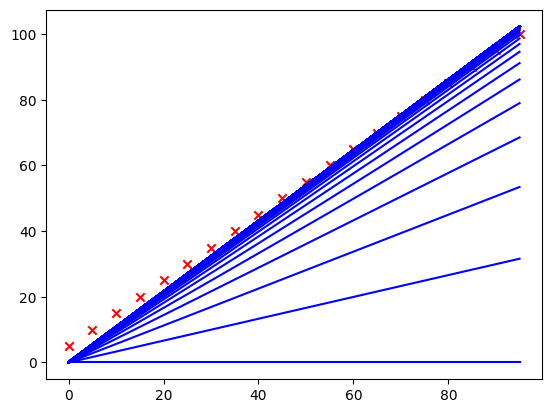

In [34]:
for i in range(epochs):

    plt.plot(x_train, predictions[i], c = 'blue', label = "predictions")

plt.scatter(x_train, y_train, marker = 'x', c = 'red', label = 'Training Data')

plt.show()

In [35]:
y_pred

array([  0.1487853 ,   5.5219882 ,  10.8951911 ,  16.26839399,
        21.64159689,  27.01479979,  32.38800269,  37.76120558,
        43.13440848,  48.50761138,  53.88081427,  59.25401717,
        64.62722007,  70.00042296,  75.37362586,  80.74682876,
        86.12003165,  91.49323455,  96.86643745, 102.23964035])

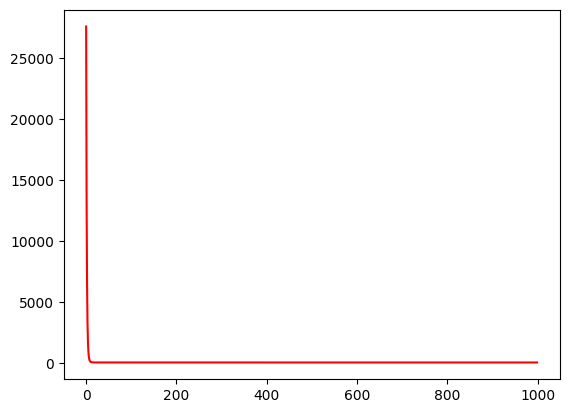

In [44]:

plt.plot(epochs_history, cost_history, c = 'red')

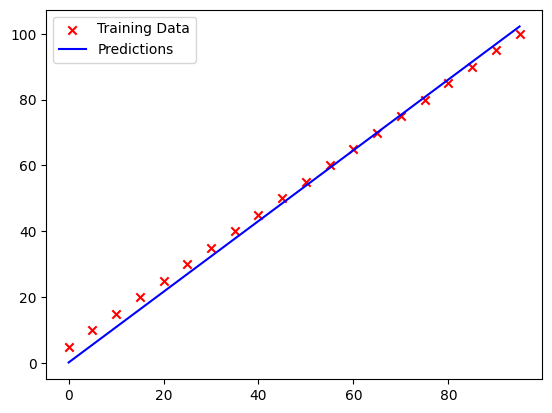

In [37]:
plot_train_pred(x_train, y_train, y_pred)